In [22]:
import numpy as np
import matplotlib.pyplot as plt

## SarcGraph Tutorial

SarcGraph incorporates functions to automatically detect and track z-discs and sarcomeres in movies of beating **human induced pluripotent stem cell-derived cardiomyocytes (hiPSC-CMs)**. In addition, SarcGraph includes the tools that enables recovering of basic sarcomere characteristics and running further high level analysis.

In this notebook we provide a tutorial on how to use the SarcGraph package using demos and examples. The focus if on the ``SarcGraph`` class in the ``sarcgraph`` module.

### Analyzie a Sample Video

The first step is to import ``SarcGraph`` class from ``sarcgraph`` module:

<font color='red'>**CHANGE THE IMPORT CODE AFTER CREATING THE PACKAGE**</font>

In [13]:
import sys
sys.path.append('../src')
from sarcgraph import SarcGraph

Create an instance of ``SarcGraph`` class:
- Specify the directory to save the results by setting ``output_dir``. (Optional)
- Specify whether the sample is a video or an image by setting ``file_type``. (Optional)

In [14]:
sg = SarcGraph(output_dir='../tutorial-results', file_type='video')

SarcGraph runs in three steps:

1) Process every frame and detect z-discs
2) Track detected z-discs throughout the movie
3) Detect sarcomeres using tracked z-discs information

Here we show how to run each step seperately:

#### Z-discs Detection Step

- Input could be the address to the video file as ``file_path`` or the video file loaded into a numpy array as ``raw_frames``.

**Note**

SarcGraph uses ``scikit`` library to load video/image files and can handle most formats. Yet, we recommend loading your sample video/image into a numpy array and pass the array as the input to ``SarcGraph`` functions, especially if the video/image is saved as a ``TIFF`` file.

In [15]:
segmented_zdiscs = sg.zdisc_segmentation(file_path='../samples/sample_0.avi')

Visualizing segmented z-discs in frame 0

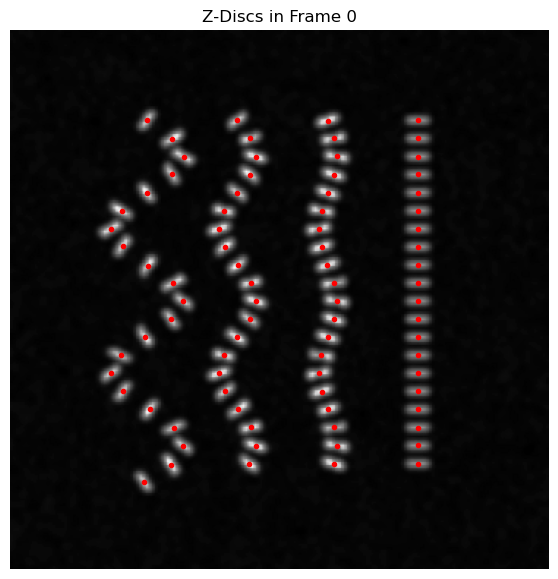

In [41]:
plt.figure(figsize=(7,7))
raw_frame = np.load(f"{sg.output_dir}/raw-frames.npy")[0, :, :, 0]
zdiscs_frame0 = segmented_zdiscs[segmented_zdiscs.frame == 0]
plt.axes().set_title('Z-Discs in Frame 0')
plt.axis('off')
plt.imshow(raw_frame, cmap='gray')
plt.plot(zdiscs_frame0.y, zdiscs_frame0.x, 'r.')

#### Z-discs Tracking Step

- If the input is the address to the video file (``file_path``) or the video loaded into a numpy array (``raw_frames``) the function runs ``sg.zdisc_segmentation()`` first.
- The input could alternatively be the information of segmented z-discs ``segmented_zdiscs``.

In [30]:
tracked_zdiscs = sg.zdisc_tracking(segmented_zdiscs=segmented_zdiscs)

Frame 79: 81 trajectories present.


In [31]:
tracked_zdiscs[tracked_zdiscs.particle==0]

,frame,x,y,p1_x,p1_y,p2_x,p2_y,particle,freq
0,0,61.227186,92.955836,66.0,88.636049,56.369634,97.000000,0,80
142,1,61.232978,92.976555,66.0,88.678667,56.358059,97.000000,0,80
222,2,61.221185,93.010706,66.0,88.755967,57.000000,97.949638,0,80
300,3,61.227284,92.985803,66.0,88.583549,57.000000,97.869002,0,80
385,4,61.492979,92.858730,66.0,88.799395,56.345733,97.000000,0,80
...,...,...,...,...,...,...,...,...,...
6143,75,61.232997,92.995017,66.0,88.807803,56.396029,97.000000,0,80
6223,76,61.217915,92.992981,66.0,88.754215,56.227241,97.000000,0,80
6304,77,61.224489,92.994633,66.0,88.761889,56.275937,97.000000,0,80
6385,78,61.218440,93.002215,66.0,88.873960,56.235529,97.000000,0,80


#### Sarcomere Detection Step

- If either ``file_path`` or ``raw_frames`` is specified the function runs ``sg.zdisc_segmentation()`` and ``sg.zdisc_tracking()`` first.
- If ``segmented_zdiscs`` is provided as the input the function runs ``sg.zdisc_tracking()`` first.
- The input could alternatively be the information of tracked z-discs ``tracked_zdiscs``.

**Note**

This step takes longer than the other two (depending on the number sarcomeres in the video and number of frames this process could take from a few seconds to a few minutes to finish).

In [33]:
_, sarcs = sg.sarcomere_detection(tracked_zdiscs=tracked_zdiscs)

Alternative way is to do all three steps at the same time:

\*note that this should take longer to finish and the output will only be the information of detected/tracked sarcomeres.

In [34]:
_, sarcs = sg.sarcomere_detection(file_path='../samples/sample_0.avi')

Frame 79: 81 trajectories present.


In [36]:
sarcs.shape

(5, 77, 80)

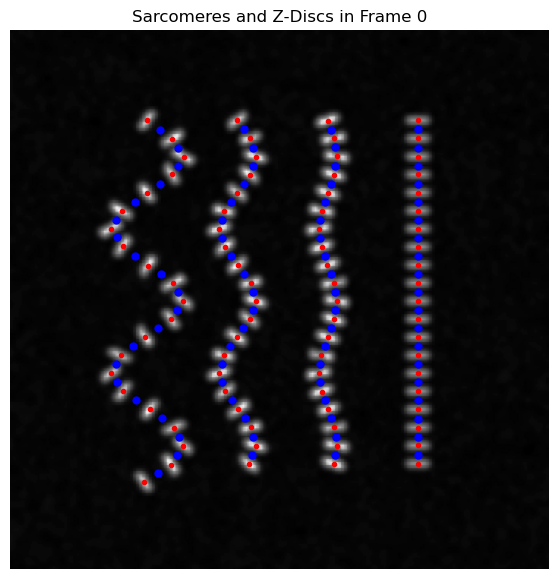

In [40]:
plt.figure(figsize=(7,7)) 
raw_frame = np.load(f"{sg.output_dir}/raw-frames.npy")[0, :, :, 0]
zdiscs_frame0 = segmented_zdiscs[segmented_zdiscs.frame == 0]
plt.axes().set_title('Sarcomeres and Z-Discs in Frame 0')
plt.axis('off')
plt.imshow(raw_frame, cmap='gray')
plt.plot(zdiscs_frame0.y, zdiscs_frame0.x, 'r.')
plt.plot(sarcs[1, :, 0], sarcs[0, :, 0], 'b.', ms=10)

### Analyzie a Sample Image